## in this project we will be working with MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Print the keys of the dataset
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


## let's look it these arrays

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

## there 70,000 images and each image has 784 features, because each image is 28 * 28 pixels
## from 0 white and 255 black

## let's plot one of these digits

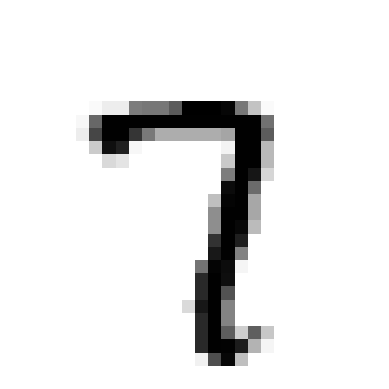

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[2024]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

## let's see what is the value in the label

In [5]:
y[2024]

'7'

## split the data into training set and test set
## the MNIST dataset is already split into train and test sets,
## 60,000 for train, and 10,000 for test 

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000], y[:60000], y[60000:]

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (784,), (60000,), (10000,))

## now we will shuffle the training set to make sure that there no similar instances.

In [8]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training binary classifier

In [9]:
## Training binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
## will reutrn true if the number is 5, otherwise false.

## let's create an SGDClassifier and train it on the whole training set.

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## now let's evaluate the model

In [11]:
sgd_clf.predict([some_digit]) ## 7

array(['7'], dtype='<U1')

## let's use cross_val_score() to evaluate our SGDClassifier moder

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

## good above 86% accuracy

## let's test the model with using cross_val_predict() and confusion_matrix

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[5535,    1,   38,   96,   18,   26,   44,    8,  155,    2],
       [   1, 6266,   66,   66,   13,   18,   15,   28,  258,   11],
       [  47,   34, 5003,  327,   69,   19,   63,   98,  285,   13],
       [  30,   10,  188, 5161,   12,  284,   29,  108,  243,   66],
       [   9,   19,   51,   23, 5337,   19,   38,   29,  120,  197],
       [  58,   16,   49,  418,   75, 4205,  103,   35,  401,   61],
       [  31,    8,  105,   38,   46,  113, 5494,    2,   80,    1],
       [  16,    9,   64,  157,   82,   13,    6, 5642,   61,  215],
       [  34,   42,   97,  287,   39,  217,   39,   30, 4960,  106],
       [  23,   21,   41,  143,  324,   85,    0,  339,  210, 4763]])

## let's use of the sklearn functions to compute the classifier metrics

In [15]:
from sklearn.metrics import precision_score, recall_score
print("precision score: ", precision_score(y_train, y_train_pred, average='micro'))
print("recall score: ", recall_score(y_train, y_train_pred, average='micro'))


precision score:  0.8727666666666667
recall score:  0.8727666666666667


## let's use F1score, F1score combines both precision and recall

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average="micro")

0.8727666666666667

## let's use the decision_function

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

## now can compute the precision and recall for all possible thresholds. 

## Training binary classifier

In [31]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
## will reutrn true if the number is 5, otherwise false.
y_scores.shape

(60000, 10)

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores,pos_label=5)

ValueError: y should be a 1d array, got an array of shape (60000, 10) instead.

## The ROC curve

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)


ValueError: multiclass format is not supported